## Introduction

Analyzing football data can provide valuable insights for fans, analysts, and the team management. Understanding player performance metrics and match outcomes can help in making informed decisions regarding player selection, game strategies, and identifying areas for improvement.

In [1]:
# import libraries that we will be using 

import requests                            #Used to send HTTP requests to web pages and retrieve HTML content
from bs4 import BeautifulSoup              # parsing HTML and XML documents, making it easy to extract data from web pages
import pandas as pd                        # Provides data structures and tools for data manipulation and analysis
import numpy as np                         # Adds support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays
from matplotlib import pyplot as plt       # plotting library for creating static, animated, and interactive visualizations in Python
import seaborn as sns

In [2]:
# website that we will get the data from

url = "https://fbref.com/en/comps/9/Premier-League-Stats"

In [3]:
data = requests.get(url)

In [4]:
soup = BeautifulSoup(data.text)

standings_table = soup.select('table.stats_table')[0]

In [5]:
links = standings_table.find_all('a')

links = [l.get('href') for l in links]

links = [l for l in links if '/squads/' in l]

In [6]:
links

['/en/squads/b8fd03ef/Manchester-City-Stats',
 '/en/squads/18bb7c10/Arsenal-Stats',
 '/en/squads/822bd0ba/Liverpool-Stats',
 '/en/squads/8602292d/Aston-Villa-Stats',
 '/en/squads/361ca564/Tottenham-Hotspur-Stats',
 '/en/squads/cff3d9bb/Chelsea-Stats',
 '/en/squads/b2b47a98/Newcastle-United-Stats',
 '/en/squads/19538871/Manchester-United-Stats',
 '/en/squads/7c21e445/West-Ham-United-Stats',
 '/en/squads/47c64c55/Crystal-Palace-Stats',
 '/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 '/en/squads/4ba7cbea/Bournemouth-Stats',
 '/en/squads/fd962109/Fulham-Stats',
 '/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats',
 '/en/squads/d3fd31cc/Everton-Stats',
 '/en/squads/cd051869/Brentford-Stats',
 '/en/squads/e4a775cb/Nottingham-Forest-Stats',
 '/en/squads/e297cd13/Luton-Town-Stats',
 '/en/squads/943e8050/Burnley-Stats',
 '/en/squads/1df6b87e/Sheffield-United-Stats']

In [7]:
team_urls = [f"https://fbref.com{l}" for l in links]

In [8]:
team_urls

['https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats',
 'https://fbref.com/en/squads/18bb7c10/Arsenal-Stats',
 'https://fbref.com/en/squads/822bd0ba/Liverpool-Stats',
 'https://fbref.com/en/squads/8602292d/Aston-Villa-Stats',
 'https://fbref.com/en/squads/361ca564/Tottenham-Hotspur-Stats',
 'https://fbref.com/en/squads/cff3d9bb/Chelsea-Stats',
 'https://fbref.com/en/squads/b2b47a98/Newcastle-United-Stats',
 'https://fbref.com/en/squads/19538871/Manchester-United-Stats',
 'https://fbref.com/en/squads/7c21e445/West-Ham-United-Stats',
 'https://fbref.com/en/squads/47c64c55/Crystal-Palace-Stats',
 'https://fbref.com/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 'https://fbref.com/en/squads/4ba7cbea/Bournemouth-Stats',
 'https://fbref.com/en/squads/fd962109/Fulham-Stats',
 'https://fbref.com/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats',
 'https://fbref.com/en/squads/d3fd31cc/Everton-Stats',
 'https://fbref.com/en/squads/cd051869/Brentford-Stats',
 'https://fbref.com/en/s

In [9]:
# Alright lets forcus on Arsneal 

arsenal_url = team_urls[1]

In [10]:
data = requests.get(arsenal_url)

In [11]:
# first table will show the players stats
player_stats = pd.read_html(data.text, match="Standard Stats")

# second table will show the matches played
matches = pd.read_html(data.text, match="Scores & Fixtures")

C:\Users\mmoki\AppData\Local\Temp\ipykernel_29264\2798006295.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  player_stats = pd.read_html(data.text, match="Standard Stats")
C:\Users\mmoki\AppData\Local\Temp\ipykernel_29264\2798006295.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")


In [12]:
# Convert the first element of each list to a DataFrame
player_stats_df = player_stats[0]
matches_df = matches[0]

Now that we have our data that we will be working with, lets perform some data cleaning.

## Data Cleaning

In [13]:
type(player_stats_df)

pandas.core.frame.DataFrame

In [14]:
type(matches_df)

pandas.core.frame.DataFrame

In [15]:
player_stats_df.columns = ['_'.join(col).strip() for col in player_stats_df.columns.values]
matches_df.columns = ['_'.join(col).strip() for col in matches_df.columns.values]

In [16]:
player_stats[0]

,Unnamed: 0_level_0_Player,Unnamed: 1_level_0_Nation,Unnamed: 2_level_0_Pos,Unnamed: 3_level_0_Age,Unnamed: 4_level_0_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,Performance_Gls,Performance_Ast,...,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG,Unnamed: 33_level_0_Matches
0,William Saliba,fr FRA,DF,22.0,38,38,3420.0,38.0,2.0,1.0,...,0.03,0.08,0.05,0.08,0.04,0.01,0.05,0.04,0.05,Matches
1,Declan Rice,eng ENG,MF,24.0,38,37,3225.0,35.8,7.0,8.0,...,0.22,0.42,0.20,0.42,0.09,0.15,0.24,0.09,0.24,Matches
2,Martin Ødegaard,no NOR,MF,24.0,35,35,3091.0,34.3,8.0,10.0,...,0.29,0.52,0.17,0.47,0.22,0.28,0.50,0.17,0.45,Matches
3,Ben White,eng ENG,DF,25.0,37,35,2988.0,33.2,4.0,4.0,...,0.12,0.24,0.12,0.24,0.03,0.11,0.15,0.03,0.15,Matches
4,Bukayo Saka,eng ENG,FW,21.0,35,35,2919.0,32.4,16.0,9.0,...,0.28,0.77,0.31,0.59,0.48,0.32,0.80,0.33,0.65,Matches
5,Gabriel Magalhães,br BRA,DF,25.0,36,34,3044.0,33.8,4.0,0.0,...,0.00,0.12,0.12,0.12,0.13,0.02,0.15,0.13,0.15,Matches
6,David Raya,es ESP,GK,27.0,32,32,2880.0,32.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
7,Kai Havertz,de GER,"MF,FW",24.0,37,30,2634.0,29.3,13.0,7.0,...,0.24,0.68,0.41,0.65,0.42,0.15,0.57,0.39,0.54,Matches
8,Gabriel Martinelli,br BRA,FW,22.0,35,24,2019.0,22.4,6.0,4.0,...,0.18,0.45,0.27,0.45,0.31,0.27,0.58,0.31,0.58,Matches
9,Oleksandr Zinchenko,ua UKR,DF,26.0,27,20,1722.0,19.1,1.0,2.0,...,0.10,0.16,0.05,0.16,0.03,0.13,0.16,0.03,0.16,Matches


In [17]:
player_stats_df = player_stats[0]
matches_df = matches[0]

In [18]:
player_stats_df.columns

Index(['Unnamed: 0_level_0_Player', 'Unnamed: 1_level_0_Nation',
       'Unnamed: 2_level_0_Pos', 'Unnamed: 3_level_0_Age',
       'Unnamed: 4_level_0_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG', 'Unnamed: 33_level_0_Matches'],
      dtype='object')

In [19]:
matches_df.head(10)

,D_a_t_e,T_i_m_e,C_o_m_p,R_o_u_n_d,D_a_y,V_e_n_u_e,R_e_s_u_l_t,G_F,G_A,O_p_p_o_n_e_n_t,x_G,x_G_A,P_o_s_s,A_t_t_e_n_d_a_n_c_e,C_a_p_t_a_i_n,F_o_r_m_a_t_i_o_n,R_e_f_e_r_e_e,M_a_t_c_h_ _R_e_p_o_r_t,N_o_t_e_s
0,2023-08-06,16:00,Community Shield,FA Community Shield,Sun,Neutral,D,1 (4),1 (1),Manchester City,NaN,NaN,45,81145,Martin Ødegaard,4-3-3,Stuart Attwell,Match Report,Arsenal won on penalty kicks following normal ...
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2,1,Nott'ham Forest,0.8,1.2,78,59984,Martin Ødegaard,4-3-3,Michael Oliver,Match Report,NaN
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1,0,Crystal Palace,2.0,1.0,53,24189,Martin Ødegaard,4-3-3,David Coote,Match Report,NaN
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2,2,Fulham,3.2,0.6,71,59961,Martin Ødegaard,4-3-3,Paul Tierney,Match Report,NaN
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3,1,Manchester Utd,2.3,0.9,55,60192,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1,0,Everton,1.0,0.3,74,39217,Martin Ødegaard,4-3-3,Simon Hooper,Match Report,NaN
6,2023-09-20,20:00,Champions Lg,Group stage,Wed,Home,W,4,0,nl PSV Eindhoven,2.3,0.5,58,58860,Martin Ødegaard,4-3-3,Felix Zwayer,Match Report,NaN
7,2023-09-24,14:00,Premier League,Matchweek 6,Sun,Home,D,2,2,Tottenham,1.8,1.4,47,60156,Martin Ødegaard,4-3-3,Robert Jones,Match Report,NaN
8,2023-09-27,19:45,EFL Cup,Third round,Wed,Away,W,1,0,Brentford,NaN,NaN,60,16688,Jorginho,4-3-3,Darren Bond,Match Report,NaN
9,2023-09-30,15:00,Premier League,Matchweek 7,Sat,Away,W,4,0,Bournemouth,3.4,0.6,57,11193,Martin Ødegaard,4-3-3,Michael Salisbury,Match Report,NaN


In [20]:
player_stats_df.head(10)

,Unnamed: 0_level_0_Player,Unnamed: 1_level_0_Nation,Unnamed: 2_level_0_Pos,Unnamed: 3_level_0_Age,Unnamed: 4_level_0_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,Performance_Gls,Performance_Ast,...,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG,Unnamed: 33_level_0_Matches
0,William Saliba,fr FRA,DF,22.0,38,38,3420.0,38.0,2.0,1.0,...,0.03,0.08,0.05,0.08,0.04,0.01,0.05,0.04,0.05,Matches
1,Declan Rice,eng ENG,MF,24.0,38,37,3225.0,35.8,7.0,8.0,...,0.22,0.42,0.20,0.42,0.09,0.15,0.24,0.09,0.24,Matches
2,Martin Ødegaard,no NOR,MF,24.0,35,35,3091.0,34.3,8.0,10.0,...,0.29,0.52,0.17,0.47,0.22,0.28,0.50,0.17,0.45,Matches
3,Ben White,eng ENG,DF,25.0,37,35,2988.0,33.2,4.0,4.0,...,0.12,0.24,0.12,0.24,0.03,0.11,0.15,0.03,0.15,Matches
4,Bukayo Saka,eng ENG,FW,21.0,35,35,2919.0,32.4,16.0,9.0,...,0.28,0.77,0.31,0.59,0.48,0.32,0.80,0.33,0.65,Matches
5,Gabriel Magalhães,br BRA,DF,25.0,36,34,3044.0,33.8,4.0,0.0,...,0.00,0.12,0.12,0.12,0.13,0.02,0.15,0.13,0.15,Matches
6,David Raya,es ESP,GK,27.0,32,32,2880.0,32.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
7,Kai Havertz,de GER,"MF,FW",24.0,37,30,2634.0,29.3,13.0,7.0,...,0.24,0.68,0.41,0.65,0.42,0.15,0.57,0.39,0.54,Matches
8,Gabriel Martinelli,br BRA,FW,22.0,35,24,2019.0,22.4,6.0,4.0,...,0.18,0.45,0.27,0.45,0.31,0.27,0.58,0.31,0.58,Matches
9,Oleksandr Zinchenko,ua UKR,DF,26.0,27,20,1722.0,19.1,1.0,2.0,...,0.10,0.16,0.05,0.16,0.03,0.13,0.16,0.03,0.16,Matches


In [21]:
player_stats = player_stats_df.rename(columns={
    'Unnamed: 0_level_0_Player': 'Player',
    'Unnamed: 1_level_0_Nation': 'Nation',
    'Unnamed: 2_level_0_Pos': 'Position',
    'Unnamed: 3_level_0_Age': 'Age',
    'Unnamed: 4_level_0_MP': 'Matches Played',
    'Playing Time_Starts': 'Starts',
    'Playing Time_Min': 'Minutes Played',
    'Playing Time_90s': '90s Played',
    'Performance_Gls': 'Goals',
    'Performance_Ast': 'Assists',
    'Unnamed: 33_level_0_Matches': 'Matches'
    # Add other renamings here as needed
})

In [22]:
# Drop specific columns by names
columns_to_drop = ['Matches']
player_stats = player_stats.drop(columns=columns_to_drop)

In [23]:
# Drop rows by index
rows_to_drop = [32, 33]  # Replace with the indices of the rows you want to drop
player_stats = player_stats.drop(rows_to_drop, axis=0)

In [24]:
# Convert columns from float to int
player_stats['Age'] = player_stats['Age'].astype(int)
player_stats['Goals'] = player_stats['Goals'].fillna(0).astype(int)
player_stats['Assists'] = player_stats['Assists'].fillna(0).astype(int)

In [25]:
pd.set_option('display.max_rows', None)  # Show all rows without truncation
pd.set_option('display.max_columns', None)  # Show all columns without truncation

player_stats.columns = [column.lower() for column in player_stats.columns]
matches_df.columns = [column.lower() for column in matches_df.columns]

In [26]:
# Remove abbreviations from the 'nation' column
player_stats['nation'] = player_stats['nation'].apply(lambda x: x.split()[1])

In [27]:
matches_df.columns

Index(['d_a_t_e', 't_i_m_e', 'c_o_m_p', 'r_o_u_n_d', 'd_a_y', 'v_e_n_u_e',
       'r_e_s_u_l_t', 'g_f', 'g_a', 'o_p_p_o_n_e_n_t', 'x_g', 'x_g_a',
       'p_o_s_s', 'a_t_t_e_n_d_a_n_c_e', 'c_a_p_t_a_i_n', 'f_o_r_m_a_t_i_o_n',
       'r_e_f_e_r_e_e', 'm_a_t_c_h_ _r_e_p_o_r_t', 'n_o_t_e_s'],
      dtype='object')

In [28]:
matches_df = matches_df.rename(columns={
    'd_a_t_e': 'date',
    't_i_m_e': 'time',
    'c_o_m_p': 'competition',
    'r_o_u_n_d': 'round',
    'd_a_y': 'day',
    'v_e_n_u_e': 'venue',
    'r_e_s_u_l_t': 'result',
    'g_f': 'goal_for',
    'g_a': 'goal_against',
    'o_p_p_o_n_e_n_t': 'opponent',
    'x_g': 'xg',
    'x_g_a': 'xga',
    'p_o_s_s': 'possasion',
    'a_t_t_e_n_d_a_n_c_e': 'attendance',
    'c_a_p_t_a_i_n': 'captain',
    'f_o_r_m_a_t_i_o_n': 'formation',
    'r_e_f_e_r_e_e': 'referee',
    'm_a_t_c_h_ _r_e_p_o_r_t': 'match_report',
    'n_o_t_e_s': 'notes'
})

In [29]:
matches_df.dtypes

date             object
time             object
competition      object
round            object
day              object
venue            object
result           object
goal_for         object
goal_against     object
opponent         object
xg              float64
xga             float64
possasion         int64
attendance        int64
captain          object
formation        object
referee          object
match_report     object
notes            object
dtype: object

In [58]:
# Example cleaning for 'goal_for'
matches_df['goal_for'] = matches_df['goal_for'].str.split(' \(', expand=True)[0].astype(int)

# Example cleaning for 'goal_against' if similar issues exist
matches_df['goal_against'] = matches_df['goal_against'].str.split(' \(', expand=True)[0].astype(int)

In [30]:
# Convert 'date' column to datetime format
matches_df['date'] = pd.to_datetime(matches_df['date'], format='%Y-%m-%d')

In [60]:
matches_df.head(10)

,date,time,competition,round,day,venue,result,goal_for,goal_against,opponent,xg,xga,possasion,attendance,captain,formation,referee,match_report,notes,year,month,goal_for_clean,goal_against_clean
0,2023-08-06,16:00,Community Shield,FA Community Shield,Sun,Neutral,D,1,1,Manchester City,NaN,NaN,45,81145,Martin Ødegaard,4-3-3,Stuart Attwell,Match Report,Arsenal won on penalty kicks following normal ...,2023,8,1,1
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2,1,Nott'ham Forest,0.8,1.2,78,59984,Martin Ødegaard,4-3-3,Michael Oliver,Match Report,NaN,2023,8,2,1
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1,0,Crystal Palace,2.0,1.0,53,24189,Martin Ødegaard,4-3-3,David Coote,Match Report,NaN,2023,8,1,0
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2,2,Fulham,3.2,0.6,71,59961,Martin Ødegaard,4-3-3,Paul Tierney,Match Report,NaN,2023,8,2,2
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3,1,Manchester Utd,2.3,0.9,55,60192,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN,2023,9,3,1
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1,0,Everton,1.0,0.3,74,39217,Martin Ødegaard,4-3-3,Simon Hooper,Match Report,NaN,2023,9,1,0
6,2023-09-20,20:00,Champions Lg,Group stage,Wed,Home,W,4,0,nl PSV Eindhoven,2.3,0.5,58,58860,Martin Ødegaard,4-3-3,Felix Zwayer,Match Report,NaN,2023,9,4,0
7,2023-09-24,14:00,Premier League,Matchweek 6,Sun,Home,D,2,2,Tottenham,1.8,1.4,47,60156,Martin Ødegaard,4-3-3,Robert Jones,Match Report,NaN,2023,9,2,2
8,2023-09-27,19:45,EFL Cup,Third round,Wed,Away,W,1,0,Brentford,NaN,NaN,60,16688,Jorginho,4-3-3,Darren Bond,Match Report,NaN,2023,9,1,0
9,2023-09-30,15:00,Premier League,Matchweek 7,Sat,Away,W,4,0,Bournemouth,3.4,0.6,57,11193,Martin Ødegaard,4-3-3,Michael Salisbury,Match Report,NaN,2023,9,4,0


## Data Analysis using matplotlib

### Top Goal Scorer

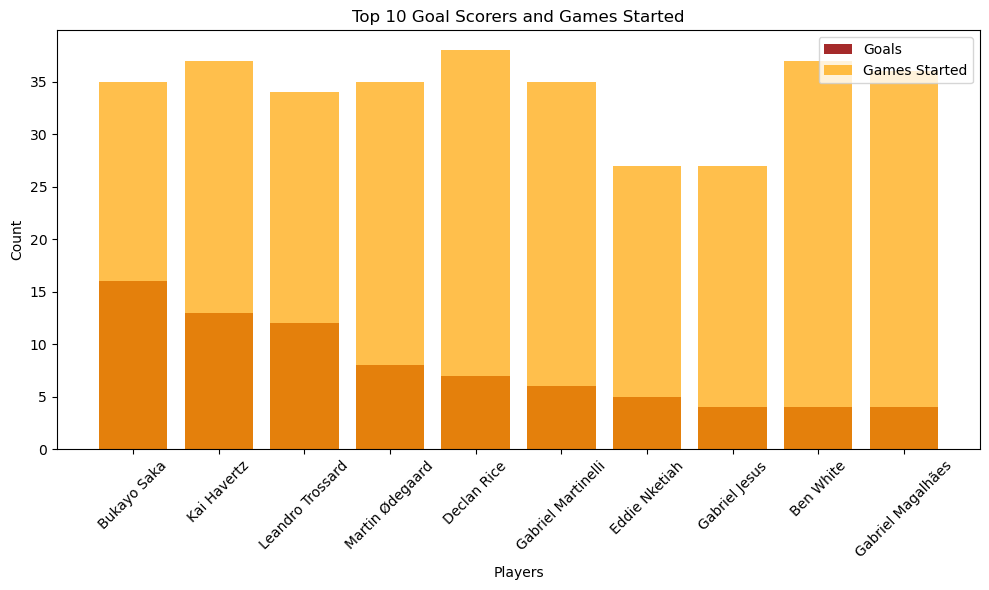

In [44]:
# Sort players by goals and assists (you may already have this sorted in your DataFrame)
top_players = player_stats.sort_values(by=['goals'], ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_scorers['player'], top_scorers['goals'], color='brown', label='Goals')
plt.bar(top_scorers['player'], top_scorers['matches played'], color='orange', alpha=0.7, label='Games Started')
plt.xlabel('Players')
plt.ylabel('Count')
plt.title('Top 10 Goal Scorers and Games Started')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Top Assist Makers

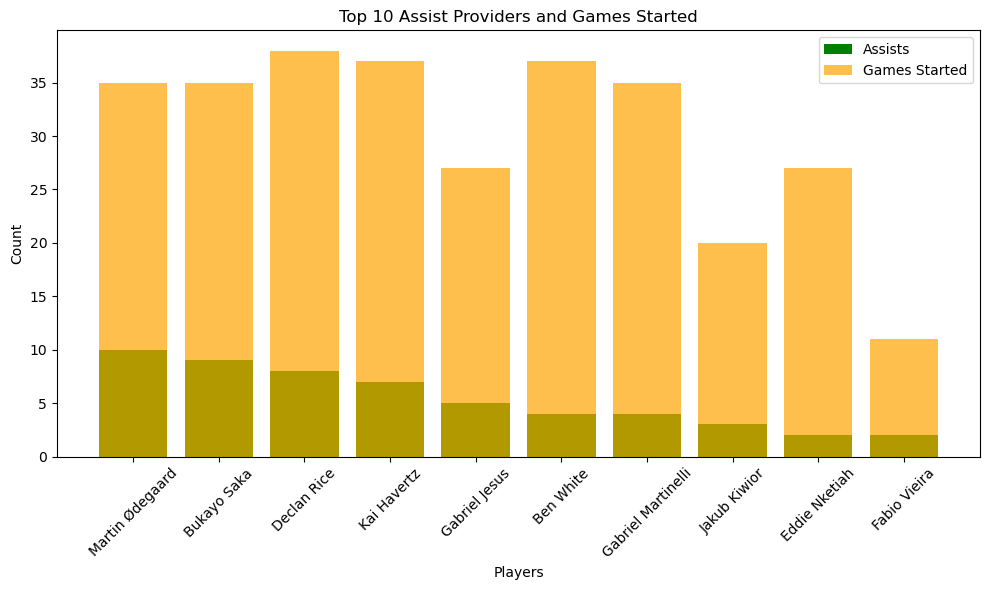

In [45]:
# Sort players by assists (you may already have this sorted in your DataFrame)
top_assisters = player_stats.sort_values(by='assists', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_assisters['player'], top_assisters['assists'], color='green', label='Assists')
plt.bar(top_assisters['player'], top_assisters['matches played'], color='orange', alpha=0.7, label='Games Started')
plt.xlabel('Players')
plt.ylabel('Count')
plt.title('Top 10 Assist Providers and Games Started')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
matches_df.head(4)

,date,time,competition,round,day,venue,result,goal_for,goal_against,opponent,xg,xga,possasion,attendance,captain,formation,referee,match_report,notes,year,month
0,2023-08-06,16:00,Community Shield,FA Community Shield,Sun,Neutral,D,1 (4),1 (1),Manchester City,NaN,NaN,45,81145,Martin Ødegaard,4-3-3,Stuart Attwell,Match Report,Arsenal won on penalty kicks following normal ...,2023,8
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2,1,Nott'ham Forest,0.8,1.2,78,59984,Martin Ødegaard,4-3-3,Michael Oliver,Match Report,NaN,2023,8
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1,0,Crystal Palace,2.0,1.0,53,24189,Martin Ødegaard,4-3-3,David Coote,Match Report,NaN,2023,8
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2,2,Fulham,3.2,0.6,71,59961,Martin Ødegaard,4-3-3,Paul Tierney,Match Report,NaN,2023,8


C:\Users\mmoki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


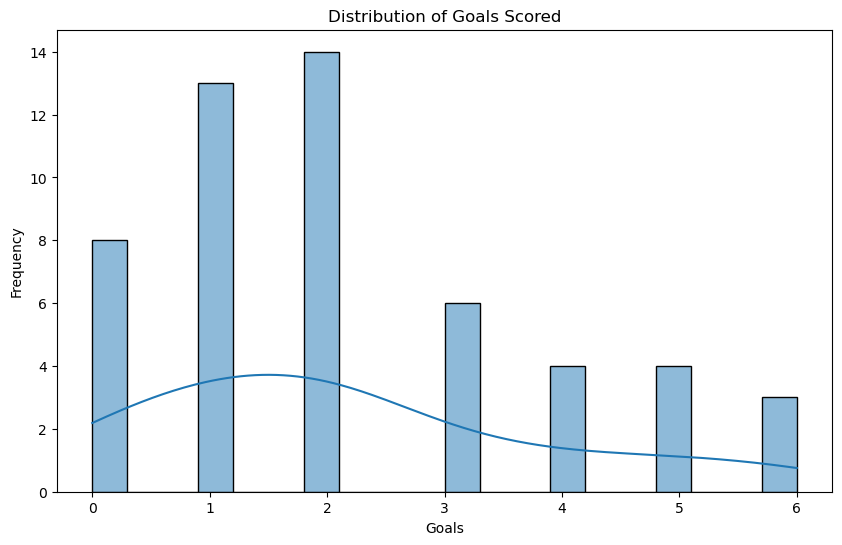

In [64]:
# Example: Histogram of goals scored
plt.figure(figsize=(10, 6))
sns.histplot(matches_df['goal_for'], bins=20, kde=True)
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

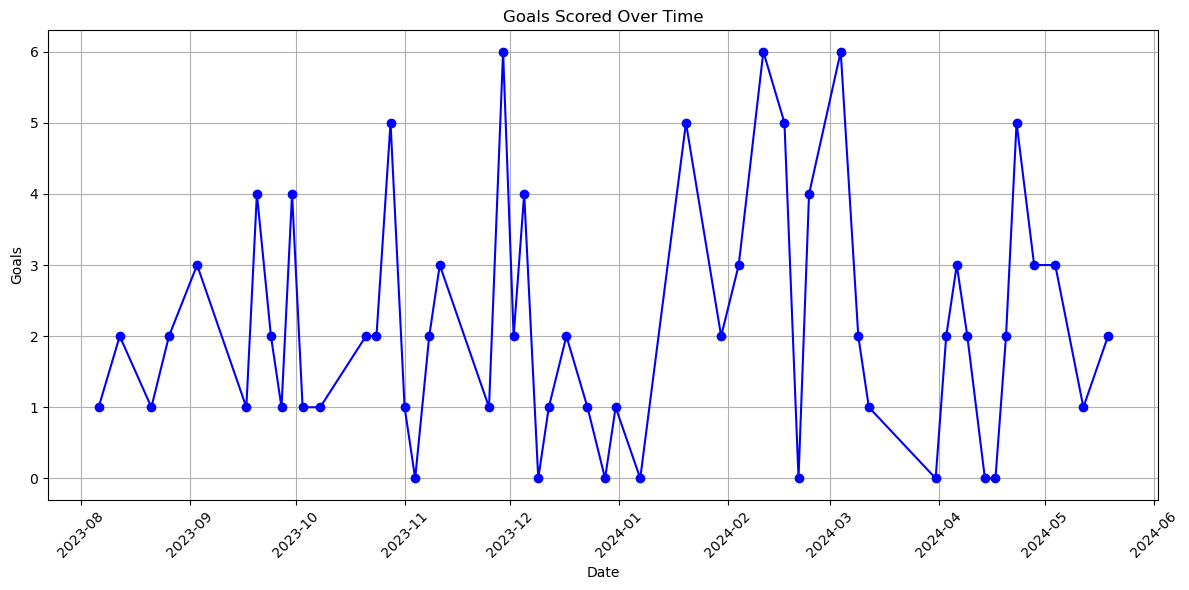

In [65]:
# Example: Line plot of goals over time
plt.figure(figsize=(12, 6))
plt.plot(matches_df['date'], matches_df['goal_for'], marker='o', linestyle='-', color='b')
plt.title('Goals Scored Over Time')
plt.xlabel('Date')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion: Exploring Football Match Data Using Web Scraping and Matplotlib

In this project, I successfully gathered football match data through web scraping techniques and utilized matplotlib for data visualization. The primary objectives were to extract meaningful insights from the data and gain a better understanding of team performance and player statistics.

Key Achievements:

Web Scraping: Implemented web scraping to collect detailed football match data, including dates, times, competitions, results, goals, and other performance metrics. This involved parsing HTML content from web pages and transforming it into structured data using Python libraries like BeautifulSoup and pandas.

Data Cleaning and Preparation: Ensured data integrity by cleaning and preparing the dataset. This included handling missing values, converting data types (e.g., dates to datetime objects), and refining textual data for analysis.

Exploratory Data Analysis (EDA): Conducted comprehensive EDA using matplotlib:

Visualized distributions of key metrics such as goals scored, expected goals (xG), and possession.
Explored relationships between variables using scatter plots and examined trends over time using line plots for time series analysis.
Analyzed correlations among performance metrics to identify patterns and dependencies.
Insights Gained:

Player Performance: Identified top performers based on goals scored, assists, and other metrics.
Team Effectiveness: Analyzed team performance trends across different competitions and venues.
Correlations: Discovered correlations between expected goals (xG) and actual goals, providing insights into team efficiency and scoring capabilities.
Matplotlib Usage: Demonstrated proficiency in matplotlib for creating clear and informative visualizations, enhancing the understanding of complex data patterns and trends.

Future Directions:

Advanced Analysis: Implement machine learning models to predict match outcomes based on historical data and performance metrics.
Interactive Dashboards: Develop interactive data dashboards using tools like Plotly or Tableau for more engaging and dynamic data exploration.
Expand Data Sources: Incorporate additional data sources such as player transfer data, injury records, or team formations for deeper analysis.
Overall, this project not only provided practical experience in web scraping and data analysis but also enhanced skills in data visualization using matplotlib, laying a solid foundation for future projects in sports analytics and beyond.



